In [20]:
import pandas as pd
import matplotlib.pyplot as plt


In [77]:
nba_frame = pd.read_csv('Resources/NBA Season Data.csv')
nba_measures = nba_frame[['Player', 'Year', 'Height', 'Weight', 'Age', 'MP']]
nba_measures = nba_measures[nba_measures['MP'] > 1000]
nba_measures_clean = nba_measures.dropna(axis = 0, how = 'any')

nba_measures_clean

,Player,Year,Height,Weight,Age,MP
859,Jason Collins,2007,84.0,255.0,28,1844
956,Michael Curry,2004,77.0,210.0,35,1229
1240,Nikoloz Tskitishvili,2003,84.0,225.0,19,1320
1365,Yakhouba Diawara,2007,79.0,225.0,24,1177
1385,Gerald Wilkins,1998,78.0,185.0,34,1252
...,...,...,...,...,...,...
17192,Michael Jordan,1990,78.0,195.0,26,3197
17200,Michael Jordan,1991,78.0,195.0,27,3034
17201,LeBron James,2013,80.0,240.0,28,2877
17203,Michael Jordan,1988,78.0,195.0,24,3311


In [78]:
#clone base dataset
nba_eras = nba_measures_clean

#create bins column in the cloned dataset, leaving the orginal intact
nba_eras['Year_Bins'] = pd.cut(x = nba_measures_clean['Year'],
                                    bins = [0, 1989, 1999, 2009, 2016],
                                    labels = ["1980s", "1990s", "2000s", "2010s"])

nba_eras

#Do necessary calculations for all the age groups
#create dataset for each age group first, this we can use in the next question to calculate the purchase analysis
#Do the calculations on those datasets individually, for each age group



,Player,Year,Height,Weight,Age,MP,Year_Bins
859,Jason Collins,2007,84.0,255.0,28,1844,2000s
956,Michael Curry,2004,77.0,210.0,35,1229,2000s
1240,Nikoloz Tskitishvili,2003,84.0,225.0,19,1320,2000s
1365,Yakhouba Diawara,2007,79.0,225.0,24,1177,2000s
1385,Gerald Wilkins,1998,78.0,185.0,34,1252,1990s
...,...,...,...,...,...,...,...
17192,Michael Jordan,1990,78.0,195.0,26,3197,1990s
17200,Michael Jordan,1991,78.0,195.0,27,3034,1990s
17201,LeBron James,2013,80.0,240.0,28,2877,2010s
17203,Michael Jordan,1988,78.0,195.0,24,3311,1980s


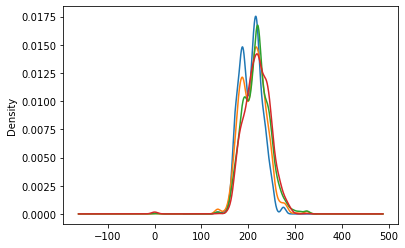

In [90]:
era_1980 = nba_eras[nba_eras['Year_Bins'] == '1980s']
era_1990 = nba_eras[nba_eras['Year_Bins'] == '1990s']
era_2000 = nba_eras[nba_eras['Year_Bins'] == '2000s']
era_2019 = nba_eras[nba_eras['Year_Bins'] == '2010s']



era_1980['Weight'].plot.density()
era_1990['Weight'].plot.density()
era_2000['Weight'].plot.density()
era_2010['Weight'].plot.density()


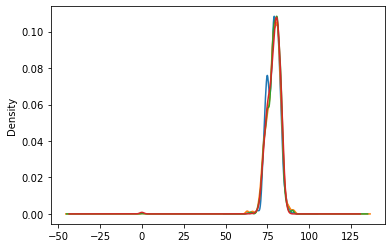

In [87]:
era_1980['Height'].plot.density()
era_1990['Height'].plot.density()
era_2000['Height'].plot.density()
era_2010['Height'].plot.density()


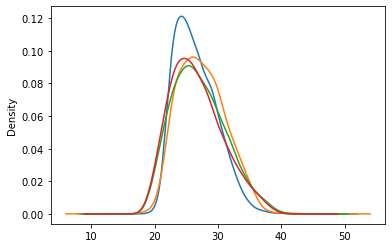

In [89]:
era_1980['Age'].plot.density()
era_1990['Age'].plot.density()
era_2000['Age'].plot.density()
era_2010['Age'].plot.density()


In [91]:
height_80 = round(era_1980['Height'].mean(), 2)
weight_80 = round(era_1980['Weight'].mean(), 2)
age_80 = round(era_1980['Age'].mean(),2)

height_90 = round(era_1990['Height'].mean(), 2)
weight_90 = round(era_1990['Weight'].mean(), 2)
age_90 = round(era_1990['Age'].mean(),2)

height_00 = round(era_2000['Height'].mean(), 2)
weight_00 = round(era_2000['Weight'].mean(), 2)
age_00 = round(era_2000['Age'].mean(),2)

height_10 = round(era_2010['Height'].mean(), 2)
weight_10 = round(era_2010['Weight'].mean(), 2)
age_10 = round(era_2010['Age'].mean(),2)


eras_size = pd.DataFrame({'Eras': [1980, 1990, 2000,2010],
                                    'Average Height': [height_80, height_90, height_00, height_10],
                                    'Average Age': [age_80, age_90, age_00, age_10],
                                    'Average Weight': [weight_80, weight_90, weight_00, weight_10]})

eras_size

,Eras,Average Height,Average Age,Average Weight
0,1980,78.67,26.48,205.63
1,1990,78.75,27.46,210.85
2,2000,78.88,27.00,217.43
3,2010,78.69,26.62,218.74


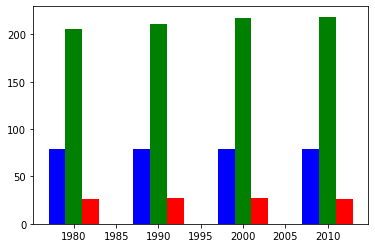

In [83]:
ax = plt.subplot(111)
w = 2
ax.bar(eras_size['Eras']-w, eras_size['Average Height'], width=w, color='b', align='center')
ax.bar(eras_size['Eras'], eras_size['Average Weight'], width=w, color='g', align='center')
ax.bar(eras_size['Eras']+w, eras_size['Average Age'], width=w, color='r', align='center')



plt.show()

In [84]:
height_80_3 = round(era_1980['Height'].median(), 2)
weight_80_3 = round(era_1980['Weight'].median(), 2)
age_80_3 = round(era_1980['Age'].median(),2)

era_1990_3 = nba_eras[nba_eras['Year_Bins'] == '1990s']
height_90_3 = round(era_1990['Height'].median(), 2)
weight_90_3 = round(era_1990['Weight'].median(), 2)
age_90_3 = round(era_1990['Age'].median(),2)

era_2000_3 = nba_eras[nba_eras['Year_Bins'] == '2000s']
height_00_3 = round(era_2000['Height'].median(), 2)
weight_00_3 = round(era_2000['Weight'].median(), 2)
age_00_3 = round(era_2000['Age'].median(),2)

era_2010_3 = nba_eras[nba_eras['Year_Bins'] == '2010s']
height_10_3 = round(era_2010['Height'].median(), 2)
weight_10_3 = round(era_2010['Weight'].median(), 2)
age_10_3 = round(era_2010['Age'].median(),2)


eras_size_3 = pd.DataFrame({'Eras': [1980, 1990, 2000,2010],
                                    'Average Height': [height_80_3, height_90_3, height_00_3, height_10_3],
                                    'Average Age': [age_80_3, age_90_3, age_00_3, age_10_3],
                                    'Average Weight': [weight_80_3, weight_90_3, weight_00_3, weight_10_3]})


eras_size_3

,Eras,Average Height,Average Age,Average Weight
0,1980,79.0,26.0,208.0
1,1990,79.0,27.0,210.0
2,2000,79.0,27.0,219.0
3,2010,79.0,26.0,220.0


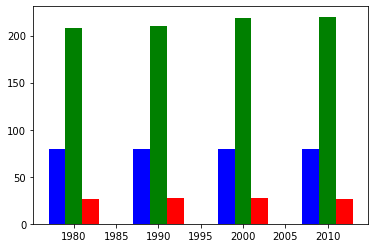

In [85]:
ax = plt.subplot(111)
w = 2
ax.bar(eras_size_3['Eras']-w, eras_size_3['Average Height'], width=w, color='b', align='center')
ax.bar(eras_size_3['Eras'], eras_size_3['Average Weight'], width=w, color='g', align='center')
ax.bar(eras_size_3['Eras']+w, eras_size_3['Average Age'], width=w, color='r', align='center')



plt.show()